# E - Commerce Sales Data Analysis Project

In [49]:
# Importation of python libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [50]:
# Extracting and loading the dataset
df = pd.read_csv(r'C:\Users\34661\Downloads\ecommerce_sales_data_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Postal Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,917 1st St,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,682 Chestnut St,Boston,MA 02215
2,176560,Google Phone,1,600,04/12/2019 14:38,669 Spruce St,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,669 Spruce St,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,333 8th St,Los Angeles,CA 90001


C:\Users\34661\AppData\Local\Temp\ipykernel_10120\644288992.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


Month
2.0     -0.871385
3.0     12.606188
4.0     -0.701939
5.0     -0.849065
6.0      5.956565
7.0     -0.562643
8.0      0.898765
9.0     -0.265701
10.0     0.125186
11.0    -0.750372
12.0     2.673332
Name: Revenue, dtype: float64


C:\Users\34661\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34661\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


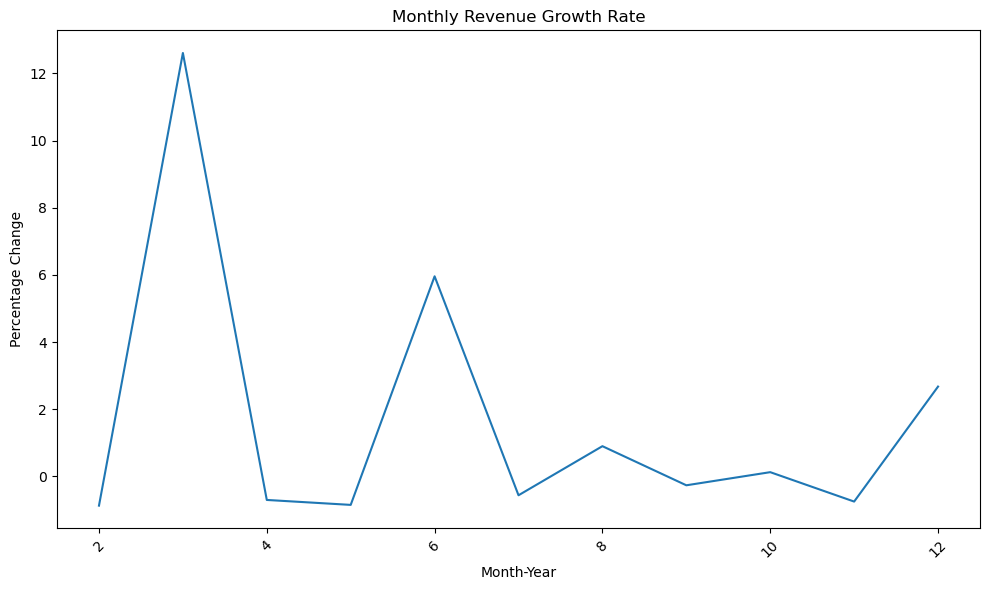

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
1   176559  Bose SoundSport Headphones               1.0       99.99   
2   176560                Google Phone               1.0      600.00   
3   176560            Wired Headphones               1.0       11.99   
4   176561            Wired Headphones               1.0       11.99   

           Order Date Purchase Address          City Postal Code  Month  \
0 2019-04-19 08:46:00       917 1st St        Dallas    TX 75001    4.0   
1 2019-04-07 22:30:00  682 Chestnut St        Boston    MA 02215    4.0   
2 2019-04-12 14:38:00    669 Spruce St   Los Angeles    CA 90001    4.0   
3 2019-04-12 14:38:00    669 Spruce St   Los Angeles    CA 90001    4.0   
4 2019-04-30 09:27:00       333 8th St   Los Angeles    CA 90001    4.0   

   Revenue  
0    23.90  
1    99.99  
2   600.00  
3    11.99  
4    11.99  


In [51]:
# Revenue Growth Analysis

# Dropping null values
df = df.dropna(how='all')

# Converting 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Creation of 'Month' Column
df['Month'] = df['Order Date'].dt.month

# Making sure that 'Quantity Ordered' and 'Price Each' are in numeric form
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Creation of Revenue Column
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

# Calculating Monthly Revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Calculating percentage change
revenue_growth = monthly_revenue.pct_change().dropna()

print(revenue_growth)

# Reset index for plotting
revenue_growth = revenue_growth.reset_index()
revenue_growth.columns = ['Month-Year', 'Revenue Growth']

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_growth, x='Month-Year', y='Revenue Growth')
plt.title('Monthly Revenue Growth Rate')
plt.xlabel('Month-Year')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to fit labels
plt.show()

# Displaying the DataFrame
print(df.head())

In [47]:
# Customer Lifetime Value

clv = df.groupby('Order ID')['Revenue'].sum().mean()
print(f'Average Customer Lifetime Value: ${clv:.2f}')

Average Customer Lifetime Value: $184.48


In [48]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Postal Code,Month,Revenue
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,917 1st St,Dallas,TX 75001,4.0,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,682 Chestnut St,Boston,MA 02215,4.0,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA 90001,4.0,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA 90001,4.0,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,333 8th St,Los Angeles,CA 90001,4.0,11.99
...,...,...,...,...,...,...,...,...,...,...
3857,248336,Apple Airpods Headphones,1.0,150.00,2019-09-27 19:52:00,47 Willow St,Atlanta,GA 30301,9.0,150.00
3858,248337,AA Batteries (4-pack),1.0,3.84,2019-09-08 19:04:00,739 Cedar St,Portland,OR 97035,9.0,3.84
3859,248338,USB-C Charging Cable,1.0,11.95,2019-09-16 10:48:00,811 12th St,Boston,MA 02215,9.0,11.95
3860,248339,Bose SoundSport Headphones,1.0,99.99,2019-09-08 21:04:00,723 North St,San Francisco,CA 94016,9.0,99.99


Product
Macbook Pro Laptop            156400.00
iPhone                         94500.00
Google Phone                   77400.00
ThinkPad Laptop                71999.28
Apple Airpods Headphones       49350.00
27in 4K Gaming Monitor         44848.85
34in Ultrawide Monitor         42178.89
Bose SoundSport Headphones     29197.08
Flatscreen TV                  28800.00
27in FHD Monitor               25198.32
Vareebadd Phone                18000.00
20in Monitor                    8909.19
LG Dryer                        8400.00
Lightning Charging Cable        7265.70
USB-C Charging Cable            6130.35
LG Washing Machine              6000.00
Wired Headphones                5191.67
AA Batteries (4-pack)           2277.12
AAA Batteries (4-pack)          2018.25
Product                            0.00
Name: Revenue, dtype: float64


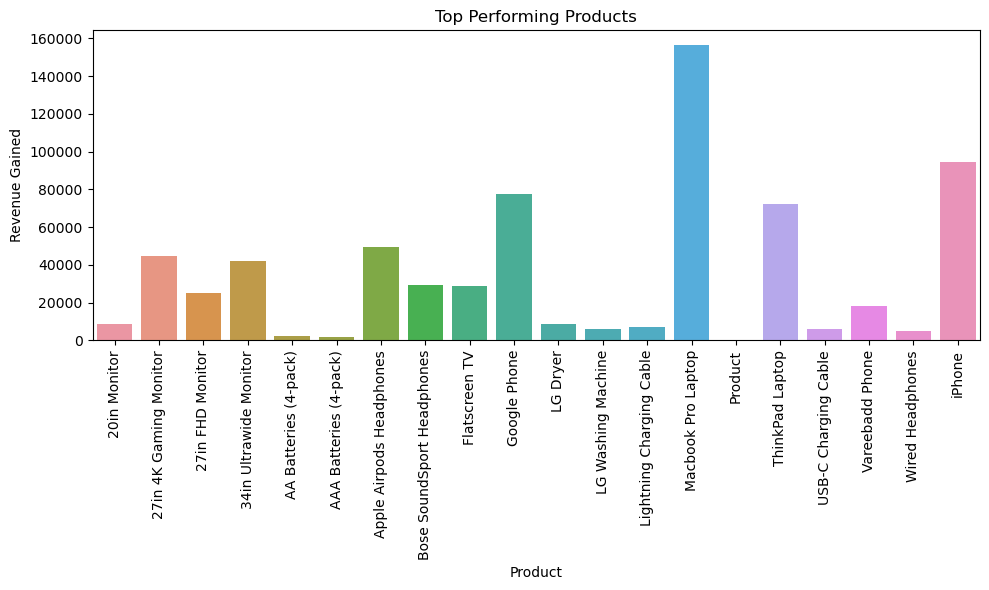

In [59]:
# Identifying Opportunities and Gaps

# a) Opportunities

# i) Top Products
top_products = df.groupby('Product')['Revenue'].sum()

print(top_products.sort_values(ascending = False))

plt.figure(figsize = (10,6))
sns.barplot(x = top_products.index, y = top_products.values)
plt.title('Top Performing Products')
plt.xlabel('Product')
plt.ylabel('Revenue Gained')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to fit labels
plt.show()

In [61]:
# Underperforming Cities 

underperforming_regions = df.groupby('City')['Revenue'].sum()

print(underperforming_regions.sort_values(ascending = True))

City
City                   0.00
 Austin            39146.64
 Portland          43788.30
 Atlanta           50227.14
 Dallas            55766.56
 Seattle           56363.31
 Boston            70197.58
 New York City     83814.20
 Los Angeles      118778.68
 San Francisco    165982.29
Name: Revenue, dtype: float64


In [62]:
# For Final Conclusion Purposes:

total_revenue = df['Revenue'].sum()
print(total_revenue)

684064.7
